# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the datasets

In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')

## Split the datasets

In [3]:
# Drop the "Unnamed: 0" column
# convabuse = convabuse.drop(columns=["Unnamed: 0", "example_no"])

In [4]:
# Output the data without the index
convabuse.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv", index=False)

In [5]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

Drop the "Unnamed: 0" column from this and future modeling iterations.

In [7]:
# Drop the "Unnamed: 0" column
# dynamically_generated_hate_speech = dynamically_generated_hate_speech.drop("Unnamed: 0", axis=1)

In [8]:
# Output the data without the index
# dynamically_generated_hate_speech.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv", index=False)

In [9]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [10]:
dynamically_generated_hate_speech_X = dynamically_generated_hate_speech.drop("label", axis=1)
dynamically_generated_hate_speech_y = dynamically_generated_hate_speech["label"]

In [11]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [12]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [13]:
# Drop the "Unnamed: 0" column
# us_elections_2020_hate_speech = us_elections_2020_hate_speech.drop(columns=["Unnamed: 0", "index"])

In [14]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [15]:
us_elections_2020_hate_speech_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us_elections_2020_hate_speech_y = us_elections_2020_hate_speech["HOF"]

# Linear Modeling

In [16]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dynamically_generated_hate_speech_X_numeric = dynamically_generated_hate_speech_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us_elections_2020_hate_speech_X_numeric = us_elections_2020_hate_speech_X.select_dtypes(include=np.number)

In [18]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [19]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dynamically_generated_hate_speech_X_scaled = dghs_scaler.fit_transform(dynamically_generated_hate_speech_X_numeric)
dynamically_generated_hate_speech_X_scaled = pd.DataFrame(dynamically_generated_hate_speech_X_scaled, columns=dynamically_generated_hate_speech_X_numeric.columns)

In [20]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [21]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us_elections_2020_hate_speech_X_scaled = us2020hs_scaler.fit_transform(us_elections_2020_hate_speech_X_numeric)
us_elections_2020_hate_speech_X_scaled = pd.DataFrame(us_elections_2020_hate_speech_X_scaled, columns=us_elections_2020_hate_speech_X_numeric.columns)

In [22]:
for columns in [convabuse_X_numeric.columns, dynamically_generated_hate_speech_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us_elections_2020_hate_speech_X_numeric.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')


In [23]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dynamically_generated_hate_speech_X_train, dynamically_generated_hate_speech_X_test, dynamically_generated_hate_speech_y_train, dynamically_generated_hate_speech_y_test = train_test_split(dynamically_generated_hate_speech_X_scaled, dynamically_generated_hate_speech_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
us_elections_2020_hate_speech_X_train, us_elections_2020_hate_speech_X_test, us_elections_2020_hate_speech_y_train, us_elections_2020_hate_speech_y_test = train_test_split(us_elections_2020_hate_speech_X_scaled, us_elections_2020_hate_speech_y, test_size=0.2, random_state=42)

In [24]:
def linear_modeling(dataset, X_train, X_test, y_train, y_test):
  # Perform linear regression on the convabuse dataset
  linear_model = LinearRegression()
  linear_model = linear_model.fit(X_train, y_train)
  linear_y_pred = linear_model.predict(X_test)
  linear_rmse = root_mean_squared_error(y_test, linear_y_pred)
  linear_r2 = r2_score(y_test, linear_y_pred)
  print(f"RMSE: {linear_rmse}")
  print(f"R2: {linear_r2}")

  # Plot the linear model
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, linear_y_pred)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
  plt.xlabel("Actual Abuse Level")
  plt.ylabel("Predicted Abuse Level")
  plt.title(f"{dataset} Linear Model")
  plt.show()

  return linear_rmse, linear_r2

RMSE: 1.2506692288951176
R2: 0.2173429826486719


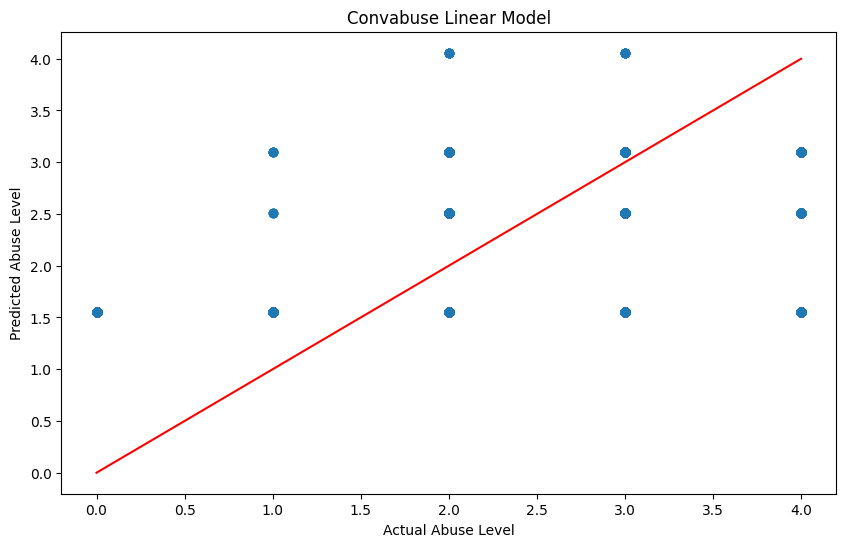

In [25]:
# Perform linear regression on the convabuse dataset
convabuse_linear_rmse, convabuse_linear_r2 = linear_modeling("Convabuse", convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test)

RMSE: 0.3365342736511525
R2: 0.5469775976385824


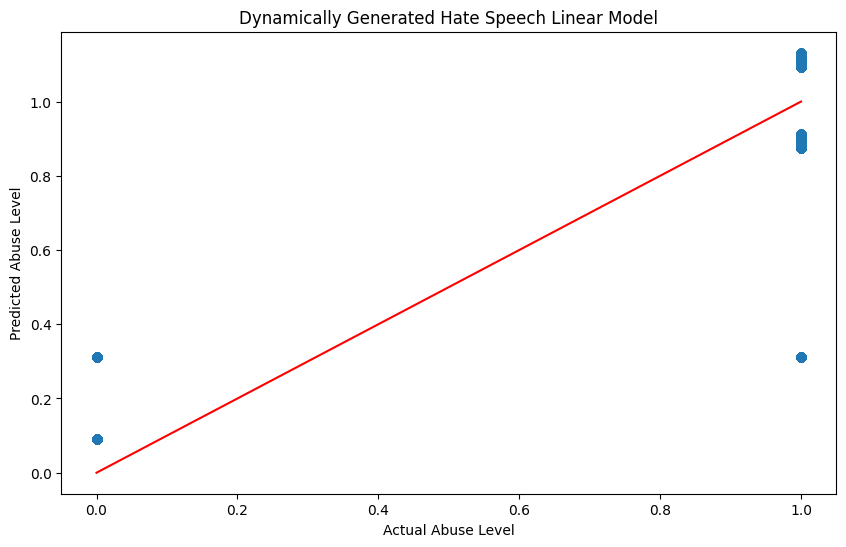

In [26]:
# Perform linear regression on the dynamically generated hate speech dataset
dynamically_generated_hate_speech_linear_rmse, dynamically_generated_hate_speech_linear_r2 = linear_modeling("Dynamically Generated Hate Speech", dynamically_generated_hate_speech_X_train, dynamically_generated_hate_speech_X_test, dynamically_generated_hate_speech_y_train, dynamically_generated_hate_speech_y_test)

RMSE: 4.1294794096422365
R2: 0.9283058632248125


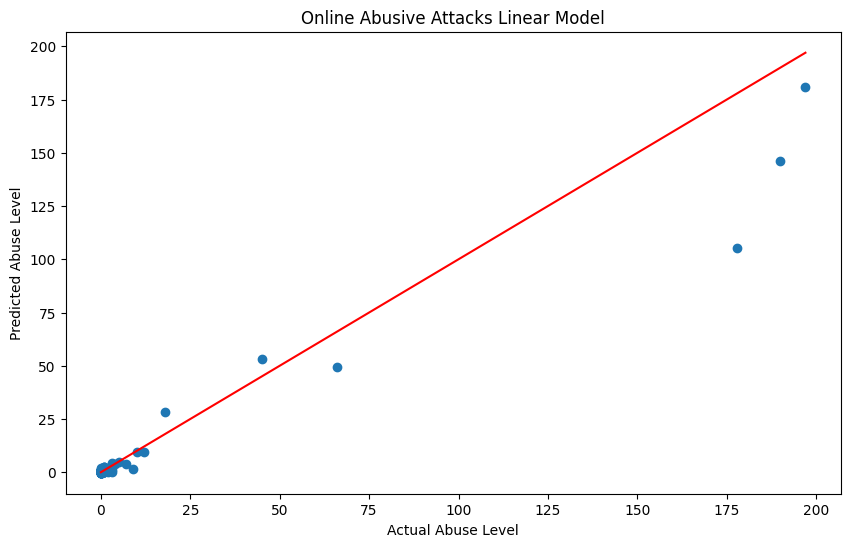

In [27]:
# Perform linear regression on the convabuse dataset
online_abusive_attacks_linear_rmse, online_abusive_attacks_linear_r2 = linear_modeling("Online Abusive Attacks", online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test)

RMSE: 0.4991128291565905
R2: 0.0027467384178758714


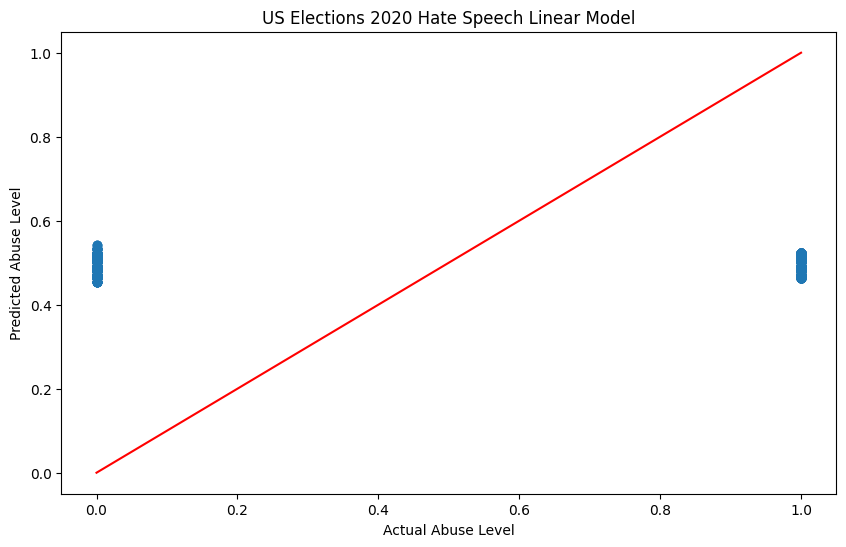

In [28]:
# Perform linear regression on the convabuse dataset
us_elections_2020_hate_speech_linear_rmse, us_elections_2020_hate_speech_linear_r2 = linear_modeling("US Elections 2020 Hate Speech", us_elections_2020_hate_speech_X_train, us_elections_2020_hate_speech_X_test, us_elections_2020_hate_speech_y_train, us_elections_2020_hate_speech_y_test)

In [29]:
# Create a dictionary where each dataset maps to its RMSE and R2
linear_model_summary_data = [
    {
        "Model": "Linear Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_linear_rmse,
        "R2": convabuse_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "Dynamically Generated Hate Speech",
        "RMSE": dynamically_generated_hate_speech_linear_rmse,
        "R2": dynamically_generated_hate_speech_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_linear_rmse,
        "R2": online_abusive_attacks_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "US Elections 2020 Hate Speech",
        "RMSE": us_elections_2020_hate_speech_linear_rmse,
        "R2": us_elections_2020_hate_speech_linear_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
linear_model_summary = pd.DataFrame(linear_model_summary_data)
linear_model_summary

,Model,Dataset,RMSE,R2
0,Linear Regression,Convabuse,1.250669,0.217343
1,Linear Regression,Dynamically Generated Hate Speech,0.336534,0.546978
2,Linear Regression,Online Abusive Attacks,4.129479,0.928306
3,Linear Regression,US Elections 2020 Hate Speech,0.499113,0.002747


In [30]:
linear_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model1_linear-model-summary.csv", index=False)